<a href="https://www.kaggle.com/code/learnerkath/netflix-data-analysis?scriptVersionId=104582737" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This is my simple analysis of Netflix Data as a part of my M.A. seminar classes.
Author: Katharina Przeperska

1. LOADING AND EXPLORING THE DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../input/netflix-original-films-imdb-scores/NetflixOriginals.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
df.tail(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [5]:
print(f"Number of rows found in the dataset is: {df.shape[0]}")
print(f"Number of columns found in the dataset is: {df.shape[1]}")

Number of rows found in the dataset is: 584
Number of columns found in the dataset is: 6


In [6]:
df.describe() # Looking at some statistical concepts e.g. Runtime and IMDB score mean

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


We can see that there are 584 movies in the dataset. We can also read that:
- Runtime mean is 93.6 with relatively high standard deviation of 27.8;
- IMDB score mean is 6.3 with relatively low standard deviation of 0.98;

In [7]:
df.info() # Types of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [8]:
# Converted panda Series type of column "Premiere" to date format
df["Date"] = pd.to_datetime(df.Premiere)

# Created a column representing days called "Day"
df['Day'] = df['Date'].dt.day_of_week 

# Created a column representing months called "Month"
df['Month'] = df['Date'].dt.month

# Created a column representing years called "Year"
df['Year'] = df['Date'].dt.year 

# Removed the "Premiere" column which is no longer needed.
df.drop("Premiere", axis=1, inplace=True)

# Previewing first 10 rows after the changes
df.head(10)

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30,4,10,2020
5,Drive,Action,147,3.5,Hindi,2019-11-01,4,11,2019
6,Leyla Everlasting,Comedy,112,3.7,Turkish,2020-12-04,4,12,2020
7,The Last Days of American Crime,Heist film/Thriller,149,3.7,English,2020-06-05,4,6,2020
8,Paradox,Musical/Western/Fantasy,73,3.9,English,2018-03-23,4,3,2018
9,Sardar Ka Grandson,Comedy,139,4.1,Hindi,2021-05-18,1,5,2021


In [9]:
# Checked for any duplicates
print(f"Number of duplicates in the in dataset: {df.duplicated().sum()}")

Number of duplicates in the in dataset: 0


2. Focused on the analysis of languages in the dataset

In [10]:
# Counted the languages of the movies:
df["Language"].nunique()
df["Language"].value_counts()
languages = df["Language"].value_counts()
languages

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [11]:
# Counted the proportion of languages 
df["Language"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(f"Proportion of movies with English as a primary langauege: {round(languages[0]/584, 2)*100}%")

Proportion of movies with English as a primary langauege: 69.0%


3. Focused on the analysis of movie length in the dataset

In [12]:
# Previewed the movies with time duration was more than 1.5 hours
runtime_limit = 90.0

runtime_filtered_data = df[df.Runtime >=runtime_limit].sort_values(by="Runtime", ascending=False) 

runtime_filtered_data

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
561,The Irishman,Crime drama,209,7.8,English,2019-11-27,2,11,2019
328,Da 5 Bloods,War drama,155,6.5,English,2020-06-12,4,6,2020
581,Springsteen on Broadway,One-man show,153,8.5,English,2018-12-16,6,12,2018
284,The Forest of Love,Drama,151,6.3,Japanese,2019-10-11,4,10,2019
247,Citation,Drama,151,6.2,English,2020-11-06,4,11,2020
...,...,...,...,...,...,...,...,...,...
535,Dick Johnson Is Dead,Documentary,90,7.5,English,2020-10-02,4,10,2020
132,One-Way to Tomorrow,Romance,90,5.6,Turkish,2020-06-19,4,6,2020
557,Justin Timberlake + The Tennessee Kids,Concert Film,90,7.7,English,2016-10-12,2,10,2016
373,Giving Voice,Documentary,90,6.7,English,2020-12-11,4,12,2020


4. Focused on the analysis of IMDB scores in the dataset

array([[<AxesSubplot:title={'center':'IMDB Score'}>]], dtype=object)

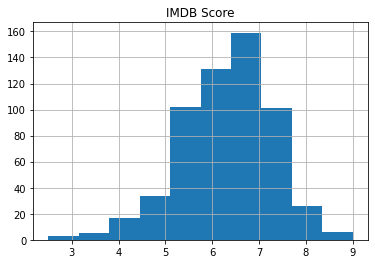

In [13]:
df.hist(column="IMDB Score")

The distribution of IMDB scores is mostly symmetrical in a bell shape, which indicates a normal distribution )as opposed to skewed one). There are a few very low scores, but they are not far from the rest of the distribution, so they might not be extreme enough to be considered outliers. Because the distribution is fairly symmetrical, we can rely on the mean of 6.3 to give us a good idea of what a typical IMDb rating is. With a standard deviation of 1, we know there is some variation in scores, but most scores fall between 4 and 8 on the 1-10 scale.

In [14]:
# Previewed the 15 best scoring movies on IMDB
highest_score_filter = 7.0
score_filtered_data = df.sort_values(by="IMDB Score", ascending=False).head(15)
score_filtered_data

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
583,David Attenborough: A Life on Our Planet,Documentary,83,9.0,English,2020-10-04,6,10,2020
582,Emicida: AmarElo - It's All For Yesterday,Documentary,89,8.6,Portuguese,2020-12-08,1,12,2020
581,Springsteen on Broadway,One-man show,153,8.5,English,2018-12-16,6,12,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,91,8.4,English/Ukranian/Russian,2015-10-09,4,10,2015
579,Taylor Swift: Reputation Stadium Tour,Concert Film,125,8.4,English,2018-12-31,0,12,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,85,8.4,English,2020-05-20,2,5,2020
577,Dancing with the Birds,Documentary,51,8.3,English,2019-10-23,2,10,2019
576,Cuba and the Cameraman,Documentary,114,8.3,English,2017-11-24,4,11,2017
573,Klaus,Animation/Christmas/Comedy/Adventure,97,8.2,English,2019-11-15,4,11,2019
571,13th,Documentary,100,8.2,English,2016-10-07,4,10,2016


In [15]:
# Counted the genre of the Netflix movies:
genre_counted_data = df["Genre"].value_counts()

genre_counted_data

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

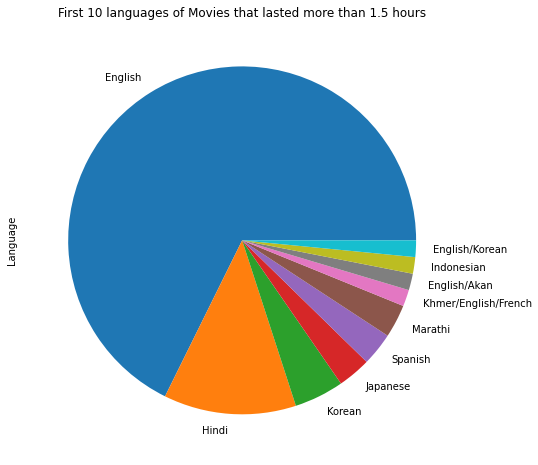

In [16]:
# Visualization
plt.figure(figsize=(8,8))
runtime_filtered_10 = runtime_filtered_data.sort_values(by="Runtime", ascending=False).head(65)
runtime_filtered_10["Language"].value_counts().head(10).plot(kind='pie')

plt.title("First 10 languages of Movies that lasted more than 1.5 hours")

plt.xticks(rotation=90)
plt.show()

4. Focused on the film genre

In [17]:
genre_counted_data.head(10)
first_5_genres = dict(genre_counted_data.head(5))
first_5_genres
genre_labesls = first_5_genres.values()

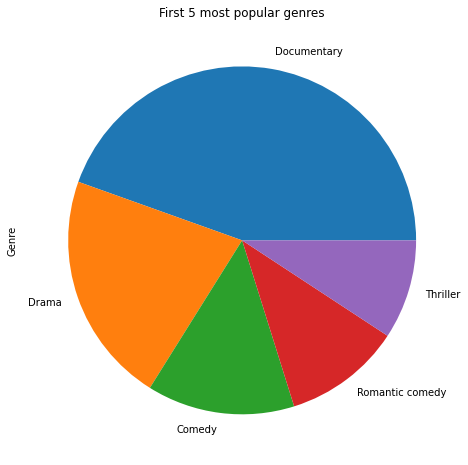

In [18]:
# Visualization
plt.figure(figsize=(8,8))
genre_counted_data.head(5).plot(kind='pie', )

plt.title("First 5 most popular genres")

plt.xticks(rotation=90)
plt.show()

Genre is a categorical variable — this variable gives information about a quality of the films that is non-numeric. We can describe categorical variables using frequencies, proportions, and ratios.

In [19]:
print(f"The mean of the set is: {round(df['Runtime'].mean(), 2)}")
print(f"The standard deviation of the set is: {round(df['Runtime'].std(), 2)}")

The mean of the set is: 93.58
The standard deviation of the set is: 27.76


array([[<AxesSubplot:title={'center':'Runtime'}>]], dtype=object)

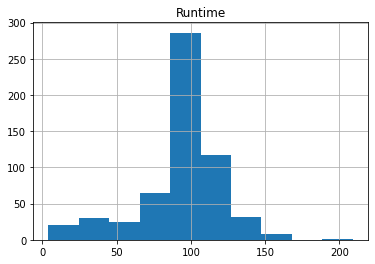

In [20]:
df.hist(column="Runtime")

Mean: 93.6

Standard Deviation: 28.4

The mean describes a typical runtime as in the low 90s. The standard deviation describes the distribution as having wide variability, with runtimes an average of almost 30 minutes different than the mean. These measurements are not wrong, but they don’t help us do a good job of summarizing what we’re seeing in the distribution.

Median: 97.0

IQR: 21.8

In contrast, the median describes a higher runtime as most typical. The low IQR indicates that half the values aren’t very far from the center value. These descriptions better match the large number of values near 100 that we see in the distribution plot.

Since the mean is less than the median, it seems like the left-skew is more influential on the mean than the high potential outlier is.

IMDb Score by Genre

Most of the mean and standard deviation pairs are not far from the overall mean and standard deviation of all IMDb scores (6.3 and 1.0). However, there are a couple of patterns that stand out.

The “Romance/Romantic Comedy” genre has the lowest standard deviation at 0.6. This may indicate this genre was pretty consistent in getting scores close to the mean of 5.9.
The “Action/Sci-Fi” and “Comedy” genres had similar mean scores to “Romance/Romantic Comedy” but a wider spread of scores.
The “Documentary” genre had the highest mean IMDb score. Since its standard deviation isn’t particularly large, this may indicate Netflix documentaries tended to rate well fairly consistently.

In [21]:
# Sorting moveis by dates - from Jan 19 to June 22
January = 1 
June = 6 

start = (df["Year"]==2019) & (df["Month"]>=January) 
finish = (df["Year"]==2022) & (df["Month"]<=June) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


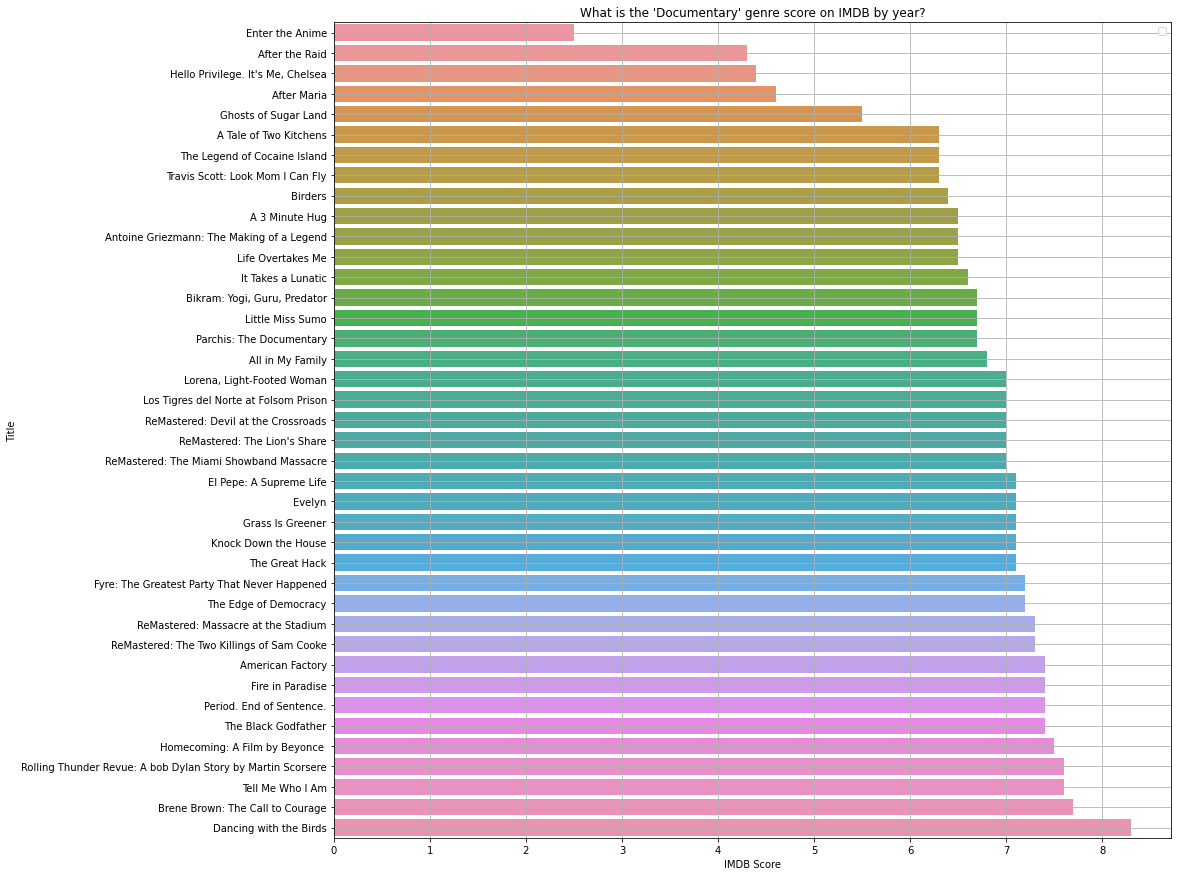

In [22]:
date_range = df.loc[:, ["Title","Genre","IMDB Score", "Date"]][df["Genre"] == "Documentary"][start | finish] 

date_range.sort_values(by = "Date", ascending=True)

plt.figure(figsize=(15,15))

sns.barplot(date_range["IMDB Score"], date_range["Title"] )


plt.title("What is the 'Documentary' genre score on IMDB by year?")
plt.legend()
plt.grid()

plt.show()

Runtime by languages

There are some interesting differences among the means and standard deviations in the table. <br>

- English, Spanish, French, and “other single” films all have around the same average runtime. However, French films have about half the standard deviation of the others. There is a lot less variability in French film runtimes.
- Hindi films have the highest mean runtime at 115 minutes. The low standard deviation indicates that Hindi films in our dataset are consistently a relatively long runtime.
- The lowest mean runtime belongs to the “multiple” language category. This is also the category with the highest standard deviation. We know the runtime distribution had a long tail of low values, so perhaps this category contains a lot of those very low runtimes that pull the mean down and widen the standard deviation.

The plot does not show any linear relationship between the two variables. The plot mainly shows a cloud of points that aren’t close to the shape of a line. Lower runtimes aren’t associated with particularly low or high IMDb scores. Higher runtimes aren’t associated with particularly low or high IMDb scores.

Most of the films have runtimes between 50 and 150 minutes with varying IMDb scores between about 6.0 and 8.0 across those runtimes in no particular pattern
The correlation coefficient of 0.92 indicates a very strong, positive linear relationship between runtimes and IMDb score. Shorter films have lower IMDb scores and longer films have higher IMDb scores. Since 0.92 is so close to 1, we conclude this pattern holds very strongly with little variation.

15 movie genres with highest IMDB scores

In [23]:
imdb_15_genre = df.loc[:, ["IMDB Score", "Genre"]].iloc[df["IMDB Score"].sort_values(ascending=False)[:15].index]
imdb_15_genre

,IMDB Score,Genre
583,9.0,Documentary
582,8.6,Documentary
581,8.5,One-man show
580,8.4,Documentary
579,8.4,Concert Film
578,8.4,Concert Film
577,8.3,Documentary
576,8.3,Documentary
573,8.2,Animation/Christmas/Comedy/Adventure
571,8.2,Documentary


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


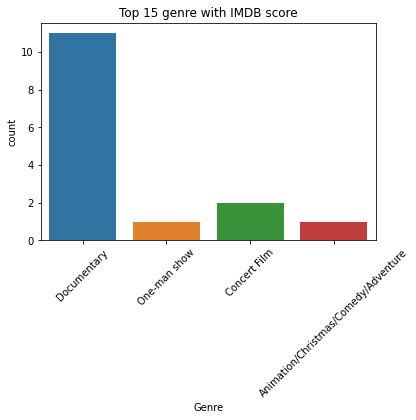

In [24]:
#viz. w. countplot

sns.countplot(imdb_15_genre.Genre)
plt.xticks(rotation=45)
plt.title("Top 15 genre with IMDB score")
plt.xticks(rotation=45)
plt.show()

**In which year was the most movies seen?**

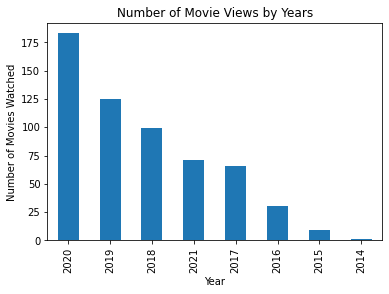

In [25]:
df["Year"].value_counts().plot(kind="bar")
plt.title("Number of Movie Views by Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies Watched")
plt.show()

**Which year has the greates runntime?**

In [26]:
years_runtime = df[["Year", "Runtime"]].groupby("Year").sum()

years_runtime 

,Runtime
Year,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


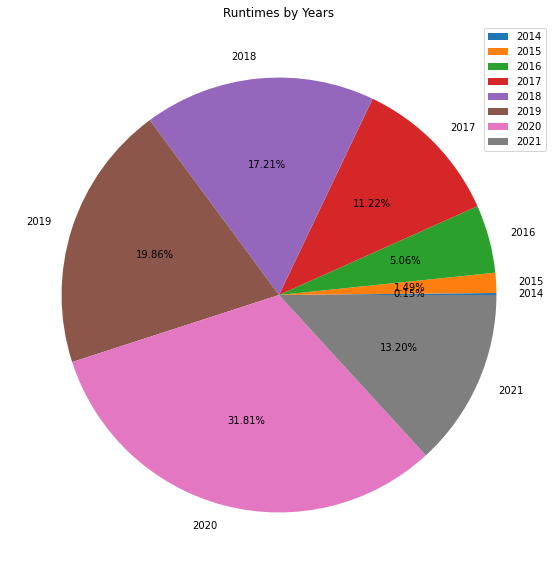

In [27]:
plt.figure(figsize=(10,10))
plt.pie(years_runtime["Runtime"], autopct="%.2f%%", labels=years_runtime.index)
plt.legend()
plt.title("Runtimes by Years")
plt.show()